# YOUR PROJECT TITLE

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Model description

## Model Choice: Heckscher-Ohlin Model

For our model project, we decided to draw on the Heckscher-Ohlin (H-O) model, which is a model in international economics that explains international trade patterns based on countries' differences in factor endowments. The core idea is that countries will export goods that intensively use their relatively abundant factors of production and import goods that intensively use their relatively scarce factors. Accordingly, the model draws on the concept of comparative advantages by considering multiple factors of production (here: technology, capital and labor), and highlights the importance of these factors' relative endowments in driving trade patterns.

## Operationalization of the Model

The provided code models a two-country, two-good world, applying the H-O model principles:

1. **Factor Intensities and Productivity Parameters**:
   Each good has defined factor intensities (`alpha` for capital and `beta` for labor) that influence how these factors contribute to production.

2. **Country Endowments**:
   Each country has specific quantities of capital (`K`) and labor (`L`), influencing their production capabilities. Additionally, technology parameters (`A`) represent the overall productivity of the two respective countries.

3. **Objective Function**:
   The function aims to maximize total production across both countries, optimizing the distribution of capital and labor across goods and countries based on output according to Cobb-Douglas production functions.

5. **Trade Simulation**:
   After determining optimal production, trade flows are calculated based on comparative production outputs, suggesting that each country exports the good it produces more efficiently relative to its domestic consumption. For simplification, there are no barriers for trade and each good is allocated in equal shares between the two countries.

## Formal Expression and Parameter Definition

**Production Functions:**
$$
Q_{i,j} = A_{i} \times K_{i,j}^{\alpha_j} \times L_{i,j}^{\beta_j}
$$
Where:
- $Q_{i,j}$ is the quantity of good $j$ produced in country $i$.
- $A_i$ is the productivity level in country $i$.
- $K_{i,j}$ and $L_{i,j}$ are the allocations of capital and labor to good $j$ in country $i$.
- $\alpha_j$ and $\beta_j$ are the capital and labor intensities for producing good $j$.

**Optimization Objective:**
$$
\text{Maximize} \, \sum_{i=1}^{2} \sum_{j=1}^{2} Q_{i,j}
$$

**Constraints:**
Total capital and labor in each country must be fully allocated:
$$
\sum_{j=1}^{2} K_{i,j} = K_i \\
\sum_{j=1}^{2} L_{i,j} = L_i
$$
for $i = \text{Home}, \text{Foreign}$.

**Trade Flow Calculation:**
$$
\text{Trade}_{i,j} = \pm (\text{Total Production}_{j} / 2 - \text{Production}_{i,j})
$$
Sign is positive for exports and negative for imports, depending on whether the balance is a surplus or deficit.


## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [21]:
# Define factor intensities and productivity parameters
alpha_1 = 0.3
alpha_2 = 0.5
beta_1 = 0.7
beta_2 = 0.5
A_home = A_foreign = 1  # Same productivity for simplicity

# Endowments in each country
K_home, L_home = 52, 48
K_foreign, L_foreign = 48, 52

# Objective function to maximize total production in both countries
def objective(x):
    K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
    Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
    Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
    Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
    Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
    return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

# Constraints for each country's total capital and labor
constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},  # Home capital
    {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},  # Home labor
    {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},  # Foreign capital
    {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}  # Foreign labor
]

# Bounds to ensure non-negative values for capital and labor
bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

# Initial guesses for capital and labor allocation
initial_guess = [15, 15, 15, 15, 10, 10, 10, 10]

# Perform optimization using SLSQP method which supports bounds
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x

    # Calculate the production of each good in each country using optimal inputs
    total_production_good1_home = round(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1),2)
    total_production_good2_home = round(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2),2)
    total_production_good1_foreign = round(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1),2)
    total_production_good2_foreign = round(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2),2)
    total_production_good1 = total_production_good1_home + total_production_good1_foreign
    total_production_good2 = total_production_good2_home + total_production_good2_foreign

    print(f"Optimization Success: {result.success}")
    print(f"Home country: Good 1 (K1H = {K1H_opt:.2f}, L1H = {L1H_opt:.2f}), Good 2 (K2H = {K2H_opt:.2f}, L2H = {L2H_opt:.2f})")
    print(f"Foreign country: Good 1 (K1F = {K1F_opt:.2f}, L1F = {L1F_opt:.2f}), Good 2 (K2F = {K2F_opt:.2f}, L2F = {L2F_opt:.2f})")
    print("Total production of Good 1 in Home Country:", total_production_good1_home)
    print("Total production of Good 2 in Home Country:", total_production_good2_home)
    print("Total production of Good 1 in Foreign Country:", total_production_good1_foreign)
    print("Total production of Good 2 in Foreign Country:", total_production_good2_foreign)
    print("Total production of Good 1:", total_production_good1)
    print("Total production of Good 2:", total_production_good2)
else:
    print("Optimization failed:", result.message)


# Additional steps to calculate and simulate trade based on comparative advantages
# Assume: Simplified trading where each country exports the good it produces more efficiently than the other country
# Trade leads to equal allocation of goods between the two countries

# Logic to identify comparative advantages (based on output ratios):
# Normally, you would calculate this based on productivity per unit of input
home_balance_good1 = round(- (total_production_good1 / 2) + total_production_good1_home,2)
home_balance_good2 = round(- (total_production_good2 / 2) + total_production_good2_home,2)
home_balance_total = round(home_balance_good1 + home_balance_good2,2)

print("Trade Flows:")
if home_balance_good1 > 0:
    print("Home exports " + str(home_balance_good1) + " units of Good 1")
elif home_balance_good1 == 0:
    print("There is no trade with Good 1")
else:
    print("Home imports " + str(home_balance_good1)[1:] + " units of Good 1")

if home_balance_good2 > 0:
    print("Home exports " + str(home_balance_good2) + " units of Good 2")
elif home_balance_good2 == 0:
    print("There is no trade with Good 1")
else:
    print("Home imports " + str(home_balance_good2)[1:] + " units of Good 2")

if result.success:
    print("Total trade balance of home country: " + str(home_balance_total))


Optimization Success: True
Home country: Good 1 (K1H = 15.39, L1H = 23.77), Good 2 (K2H = 36.61, L2H = 24.23)
Foreign country: Good 1 (K1F = 22.94, L1F = 35.42), Good 2 (K2F = 25.06, L2F = 16.58)
Total production of Good 1 in Home Country: 20.86
Total production of Good 2 in Home Country: 29.79
Total production of Good 1 in Foreign Country: 31.1
Total production of Good 2 in Foreign Country: 20.38
Total production of Good 1: 51.96
Total production of Good 2: 50.17
Trade Flows:
Home imports 5.12 units of Good 1
Home exports 4.7 units of Good 2
Total trade balance of home country: -0.42


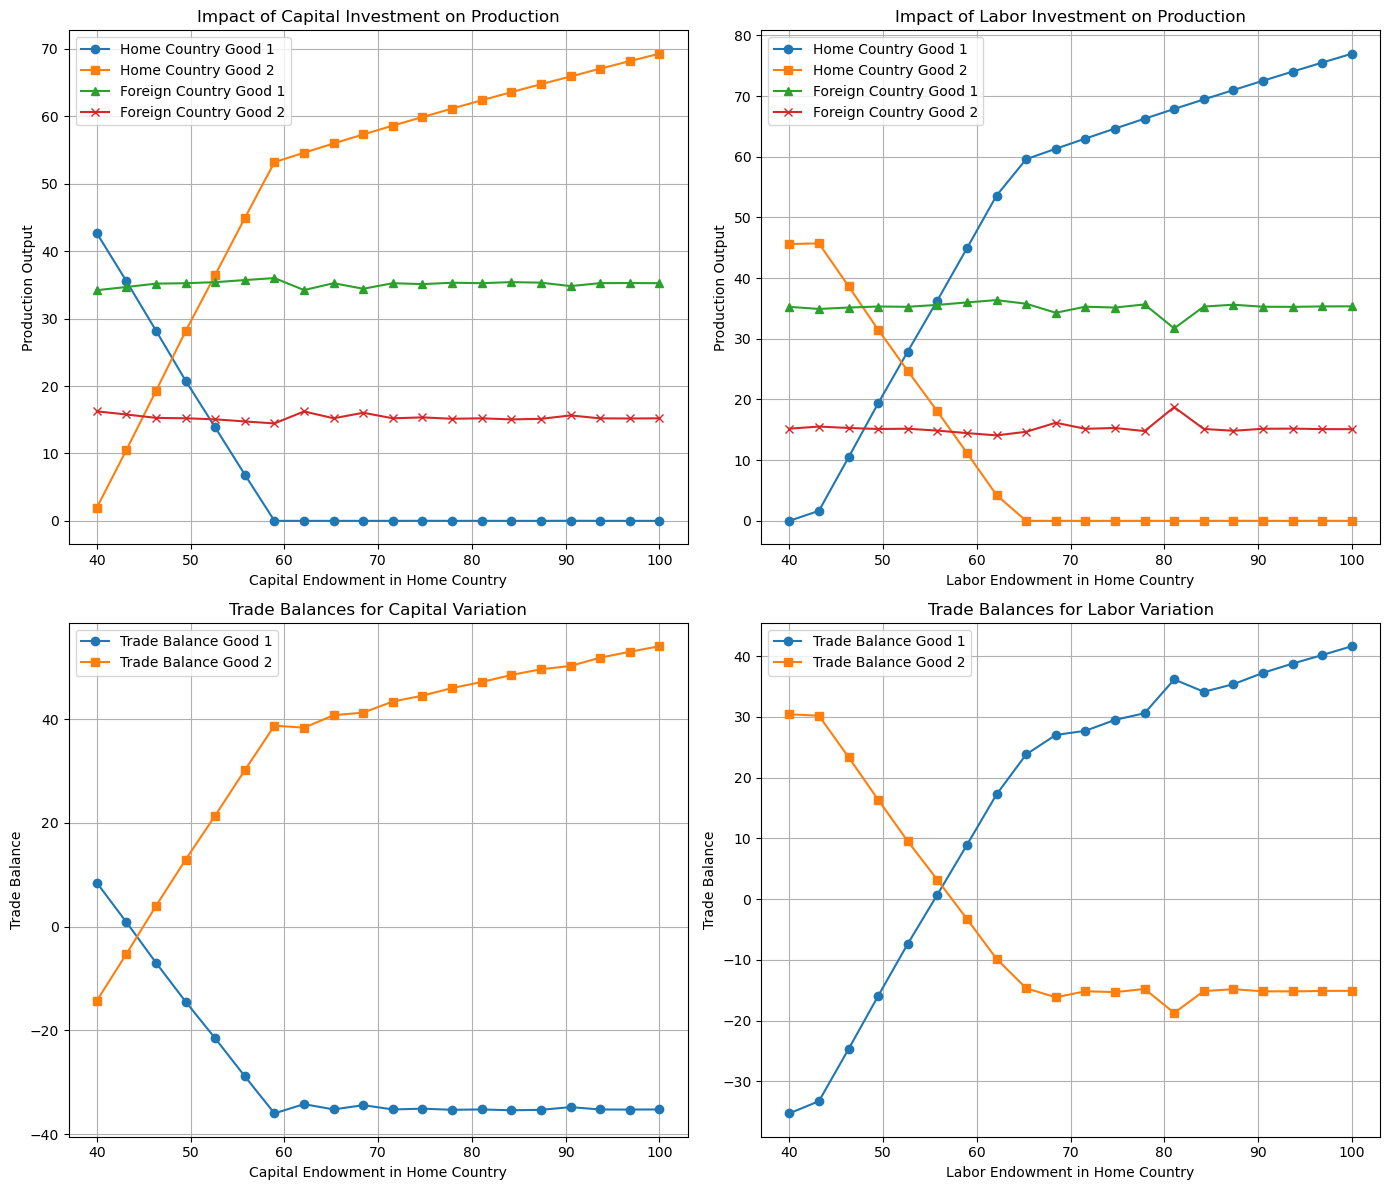

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# Factor intensities and productivity parameters
alpha_1 = 0.4
alpha_2 = 0.5
beta_1 = 0.6
beta_2 = 0.5
A_home = A_foreign = 1  # Same productivity for simplicity

# Range of capital and labor to vary
K_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of capital
L_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of labor

# Results lists for capital and labor variation
Q1H_results_cap = []
Q2H_results_cap = []
Q1F_results_cap = []
Q2F_results_cap = []

Q1H_results_lab = []
Q2H_results_lab = []
Q1F_results_lab = []
Q2F_results_lab = []

trade_balance_good1_cap = []
trade_balance_good2_cap = []
trade_balance_good1_lab = []
trade_balance_good2_lab = []

# Fixed foreign capital and labor endowments
K_foreign, L_foreign = 48, 52

# Loop over capital endowments
for K_home in K_home_values:
    L_home = 48  # Fixed labor for capital variation plot
    def objective(x):
        K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
        Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
        Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
        Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
        Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
        return -(Q1H + Q2H + Q1F + Q2F)
    constraints = [
        {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},
        {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},
        {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},
        {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}
    ]
    bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    initial_guess = [10, 10, 10, 10, 10, 10, 10, 10]
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_cap.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_cap.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_cap.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_cap.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))
        trade_balance_good1_cap.append(Q1H_results_cap[-1] - Q1F_results_cap[-1])
        trade_balance_good2_cap.append(Q2H_results_cap[-1] - Q2F_results_cap[-1])

# Loop over labor endowments
for L_home in L_home_values:
    K_home = 52  # Fixed capital for labor variation plot
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_lab.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_lab.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_lab.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_lab.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))
        trade_balance_good1_lab.append(Q1H_results_lab[-1] - Q1F_results_lab[-1])
        trade_balance_good2_lab.append(Q2H_results_lab[-1] - Q2F_results_lab[-1])

# Plotting the results for capital and labor variations
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)  # Capital plot
plt.plot(K_home_values, Q1H_results_cap, label='Home Country Good 1', marker='o')
plt.plot(K_home_values, Q2H_results_cap, label='Home Country Good 2', marker='s')
plt.plot(K_home_values, Q1F_results_cap, label='Foreign Country Good 1', marker='^')
plt.plot(K_home_values, Q2F_results_cap, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Capital Investment on Production')
plt.xlabel('Capital Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)  # Labor plot
plt.plot(L_home_values, Q1H_results_lab, label='Home Country Good 1', marker='o')
plt.plot(L_home_values, Q2H_results_lab, label='Home Country Good 2', marker='s')
plt.plot(L_home_values, Q1F_results_lab, label='Foreign Country Good 1', marker='^')
plt.plot(L_home_values, Q2F_results_lab, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Labor Investment on Production')
plt.xlabel('Labor Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

# Additional plots for trade balances
plt.subplot(2, 2, 3)
plt.plot(K_home_values, trade_balance_good1_cap, label='Trade Balance Good 1', marker='o')
plt.plot(K_home_values, trade_balance_good2_cap, label='Trade Balance Good 2', marker='s')
plt.title('Trade Balances for Capital Variation')
plt.xlabel('Capital Endowment in Home Country')
plt.ylabel('Trade Balance')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(L_home_values, trade_balance_good1_lab, label='Trade Balance Good 1', marker='o')
plt.plot(L_home_values, trade_balance_good2_lab, label='Trade Balance Good 2', marker='s')
plt.title('Trade Balances for Labor Variation')
plt.xlabel('Labor Endowment in Home Country')
plt.ylabel('Trade Balance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 